In [17]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import AHM
reload(AHM)
mM = AHM.Model(Del0A = 0.2, Del0B=0, Del0C= -0.2, U=0, t=0, inhomp=False, inhomi=True)

H = mM.HBdG()


In [18]:
k = np.linspace(0, 2*np.pi, 100)

k1 = np.ones(100)
k0 = np.zeros(100)
path = np.concatenate((k, k, k*np.sqrt(2)))
kx = np.concatenate((k,np.pi*2*k1, k[::-1]))
ky = np.concatenate((k0, k, k[::-1]))

p = [i for i in range(np.shape(path)[0])]
np.shape(p)
energies = mM.solvHam(kx, ky)

np.shape(energies)
emax = np.amax(energies)
emax = emax+0.1*emax

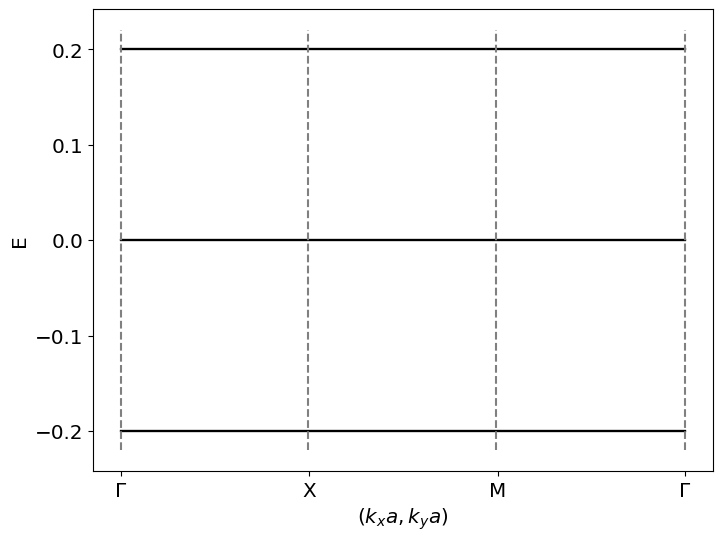

In [19]:
plt.figure(figsize=(8,6))
plt.xlabel("$(k_x a,k_y a)$", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(ticks= [0, 100, 200, 299], labels=[r"$\Gamma$",r"X",r"M", r"$\Gamma$"], size='x-large')
#plt.ylim((-0.5, 0.5))

for i in energies:
    plt.plot(p, i, color='black')
#for i in energies2:
#    plt.plot(p, i, color='green', linestyle='dashdot')
#plt.plot(p, energies4[0], color='black', label=r'$\Delta_0=0.5$')
#plt.plot(p, energies2[0], color='green', linestyle='dashdot', label=r'$\Delta_0=1$')

plt.vlines([0, 99, 199, 299], [-emax, -emax, -emax, -emax], [emax, emax, emax, emax], colors= 'grey', linestyles='--')
#plt.vlines(250, -2, 2)
#plt.legend(fontsize='x-large')
plt.savefig("Pictures/ESCpath.png")
plt.show()

In [65]:
evals = np.linalg.eig(H(k[0], k[0]))[0]
sortedEVals = np.zeros(12)
indexmap = np.zeros(12)
c=0
d =-1
inbet = np.unique(evals)[::-1]
l=np.shape(inbet)[0]
for t in inbet:
    for i, j in enumerate(evals):
        if j == t:
            d+=1
            indexmap[(l+1)*c+d]=i
                   
    sortedEVals[(l+1)*c:(l+1)*c+d+1]=t
    d=-1
    c+=1



C:\Users\atsch\AppData\Local\Temp\ipykernel_12936\3429684957.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  sortedEVals[(l+1)*c:(l+1)*c+d+1]=t


In [70]:
np.shape(np.linalg.eig(H(k[0], k[0]))[1])

(12, 12)

In [79]:
Uarr = np.zeros((12,12))
Evec = np.linalg.eig(H(k[0], k[0]))[1]
for i in range(12):
    Uarr[i]=Evec[int(indexmap[i])]

C:\Users\atsch\AppData\Local\Temp\ipykernel_12936\1876132664.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  Uarr[i]=Evec[int(indexmap[i])]


In [80]:
Uarr

array([[ 0.70710678, -0.70710678,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-0.        , -0.        , -0.70710678,  0.70710678,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-0.        , -0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ],
       [-0.        , -0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.70710678,  0.70710678,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-0.        , -0.        ,  0.        ,  0.        ,  0.70710678,
        -0.70710678,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.70710678,  0.70710678,  0.        ,  0.        ,  0.        ,
         0.        ,  